In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import os
os.chdir('/home/ubuntu/Masters_Thesis/scripts')
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ['/home/ubuntu/Masters_Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

In [2]:
W = 1

In [3]:
processed = pd.read_csv(f'/home/ubuntu/Masters_Thesis/results/final_results/final_model_results/Processed_Result_W{W}.csv')
nonprocessed = pd.read_csv(f'/home/ubuntu/Masters_Thesis/results/final_results/final_model_results/NonProcessed_Result_W{W}.csv')

In [4]:
processed.drop(columns={'Unnamed: 0'}, inplace = True)
nonprocessed.drop(columns={'Unnamed: 0'}, inplace = True)

In [5]:
full_data = pd.merge(nonprocessed, processed, on=['network_name', 'feature'], suffixes=('_np', '_p'))

In [6]:
full_data

,network_name,mae_5_100_np,feature,mae_15_100_np,mae_30_100_np,mae_5_500_np,mae_15_500_np,mae_30_500_np,mae_5_100_p,mae_15_100_p,mae_30_100_p,mae_5_500_p,mae_15_500_p,mae_30_500_p
0,CNN,552.009973,Price-Only,559.114659,687.746735,588.248372,643.577775,632.984640,552.009973,559.114659,687.746735,588.248372,643.577775,632.984640
1,GRU,493.453092,Price-Only,552.385532,264.116189,820.720606,604.380949,629.146263,493.453092,552.385532,264.116189,820.720606,604.380949,629.146263
2,LSTM,508.049036,Price-Only,365.688797,400.624737,713.902869,564.347869,831.019072,508.049036,365.688797,400.624737,713.902869,564.347869,831.019072
3,LSTM_GRU,1021.829072,Price-Only,983.559093,918.412799,793.525650,641.170548,640.981235,1021.829072,983.559093,918.412799,793.525650,641.170548,640.981235
4,RNN,1029.692755,Price-Only,832.905964,788.875455,1061.240198,984.431079,896.094426,1029.692755,832.905964,788.875455,1061.240198,984.431079,896.094426
5,RNN_GRU,959.514972,Price-Only,1001.825061,1040.067376,1701.153248,1478.697485,1235.713357,959.514972,1001.825061,1040.067376,1701.153248,1478.697485,1235.713357
6,CNN,750.055582,Bert,536.315557,540.342110,432.413703,654.311560,845.377458,740.702534,628.280872,469.258793,636.367260,559.525264,577.339528
7,CNN,491.356408,Flair,414.773865,479.197701,401.795425,639.791385,598.974809,688.246807,637.783189,525.881227,625.890819,577.864230,474.008537
8,CNN,716.981799,Roberta,597.823940,604.972306,592.369052,609.708105,906.371310,755.493914,603.188399,515.637474,674.474638,581.163140,758.650939
9,CNN,693.933462,TB_Polarity,547.659099,553.920535,752.082449,1147.179765,797.965889,546.995811,544.452421,520.568190,543.653286,746.216626,404.234820


In [7]:
full_data.set_index(['network_name', 'feature'], inplace=True)
min_values = full_data.min(axis=1)
min_values = min_values.reset_index(name='min_mae')

In [8]:
result_df = min_values.pivot_table(index='network_name', columns='feature', values='min_mae', aggfunc='min')
result_df = result_df[['Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta', 'Price-Only']]

In [9]:
result_df

feature,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta,Price-Only
network_name,,,,,,,
CNN,401.795425,404.234820,442.839355,428.082971,432.413703,515.637474,552.009973
GRU,296.782172,325.513651,312.712261,318.881769,300.829331,313.290725,264.116189
LSTM,247.513204,256.776553,325.473718,298.440258,367.574904,205.996297,365.688797
LSTM_GRU,358.932679,464.943643,296.280926,491.943661,276.826260,224.207229,640.981235
RNN,453.214063,488.579670,474.588577,472.732566,468.850205,502.419041,788.875455
RNN_GRU,531.955808,576.723579,580.510317,554.703532,550.041293,528.611142,959.514972


In [10]:
full_data = full_data.reset_index()

best_model_details = []

for model in result_df.index:
    for feature in result_df.columns:
        network_name = model
        target_value = result_df.loc[model, feature]
        col_name = full_data[(full_data['network_name'] == network_name) & (full_data['feature'] == feature)].eq(target_value).idxmax(axis=1)
        _, input_dimension, epochs, pr = col_name.iloc[0].split('_')
        if pr == 'p':
            processed = True
        else:
            processed = False
        best_model_details.append({'network_name': network_name, 'feature': feature, 'MAE': target_value, 'Processed': processed, 'epochs': epochs, 'input_dimension': input_dimension,})
        
best_model_details = pd.DataFrame(best_model_details)

In [11]:
best_model_details.sort_values('MAE', ascending=True)

,network_name,feature,MAE,Processed,epochs,input_dimension
19,LSTM,Roberta,205.996297,False,100,30
26,LSTM_GRU,Roberta,224.207229,True,500,30
14,LSTM,Flair,247.513204,True,100,30
15,LSTM,TB_Polarity,256.776553,True,100,30
13,GRU,Price-Only,264.116189,False,100,30
25,LSTM_GRU,Bert,276.826260,True,500,30
23,LSTM_GRU,TB_Subjectivity,296.280926,True,500,30
7,GRU,Flair,296.782172,False,100,30
17,LSTM,Vader,298.440258,True,100,30
11,GRU,Bert,300.829331,True,100,30


In [12]:
full_data.set_index(['network_name', 'feature'], inplace=True)
stacked = full_data.stack()
lowest_10 = stacked.sort_values().head(20)
lowest_10_df = lowest_10.reset_index()
lowest_10_df.columns = ['network_name', 'feature', 'column', 'mae']

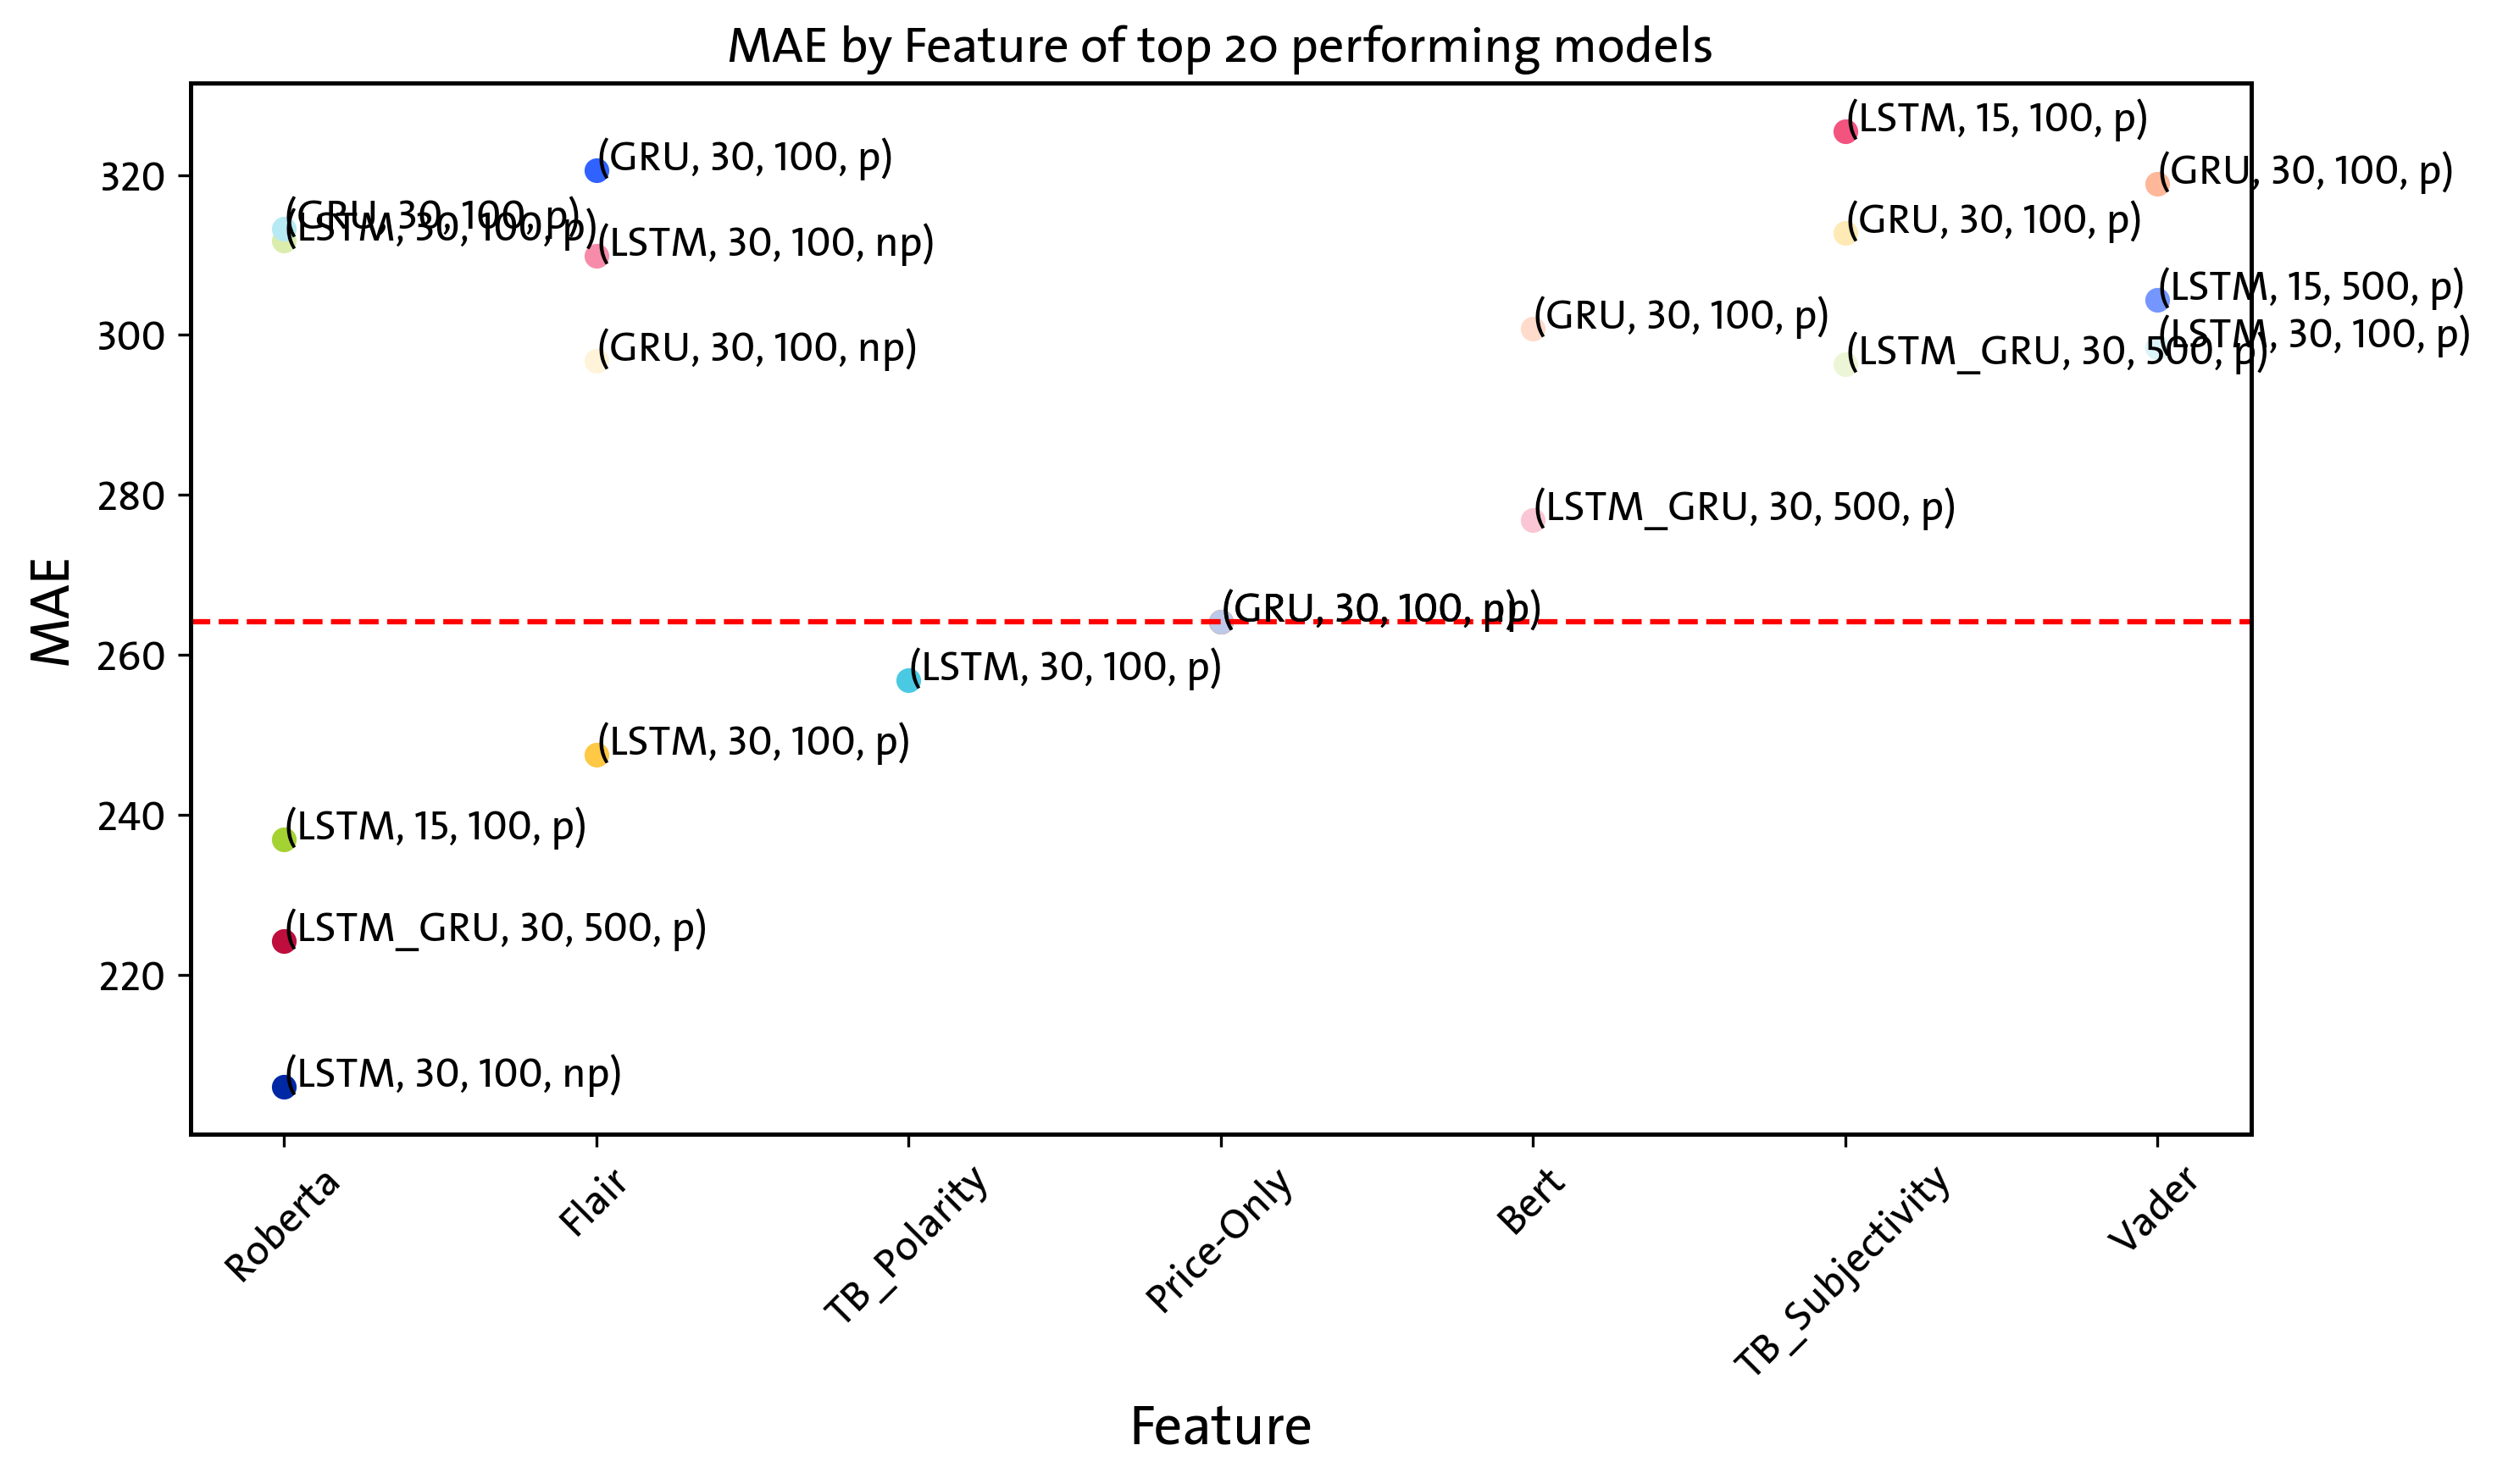

In [13]:
def plot_point_graph(df):
    df = df 
    plt.figure(figsize=(10, 6))
    
    min_price_only = df.loc[df['feature'] == 'Price-Only', 'mae'].min()
    
    for index, row in df.iterrows():
        plt.scatter(row['feature'], row['mae'], label=row['network_name'])
        plt.text(row['feature'], row['mae'], f"({row['network_name']}, {row['column'].split('_')[-3]}, {row['column'].split('_')[-2]}, {row['column'].split('_')[-1]})")

    plt.axhline(y=min_price_only, color='r', linestyle='--', label=f'Least Price-Only Value ({min_price_only:.2f})')
    
    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('MAE')
    plt.title('MAE by Feature of top 20 performing models')
    plt.xticks(rotation=45)

    # Show plot
    plt.tight_layout()
    plt.savefig(f'/home/ubuntu/Masters_Thesis/results/result_plots/Top20MAEFeaturePlot_W{W+1}.pdf', bbox_inches='tight', facecolor='white')
    plt.show()
    
plot_point_graph(lowest_10_df)

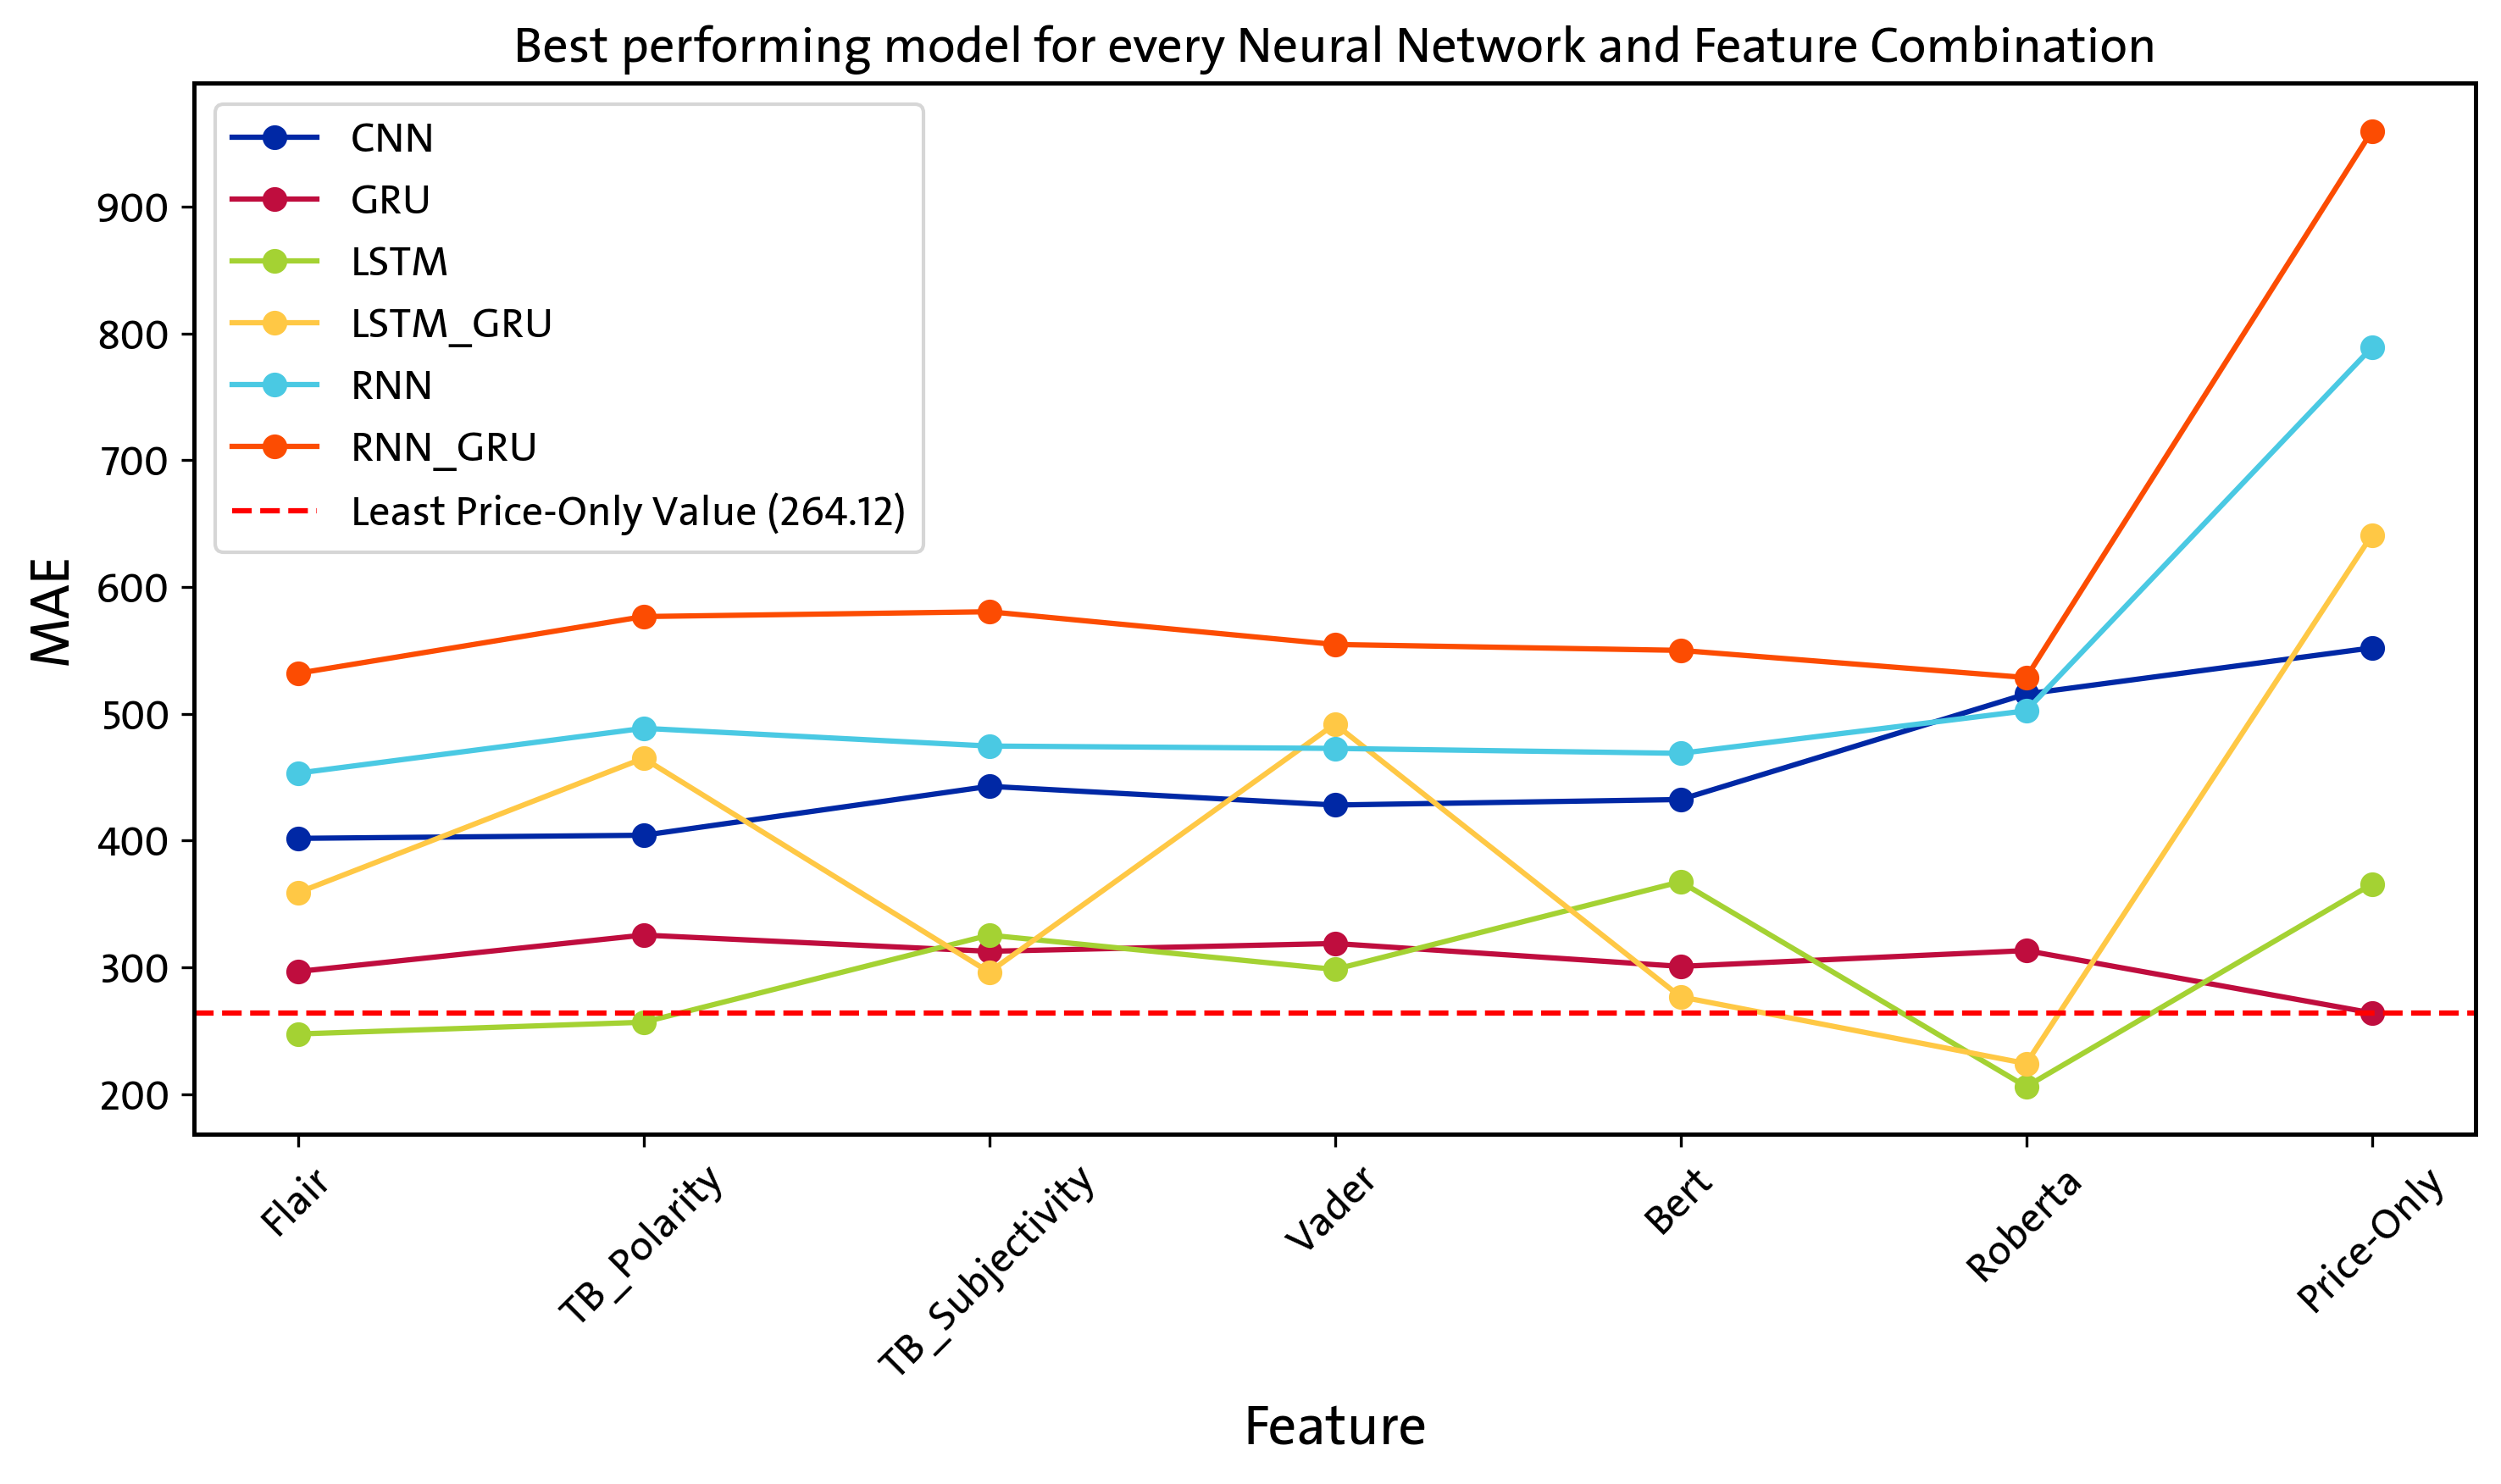

In [14]:
def create_best_performing_line_plot(df):
    df = df.transpose()
    plt.figure(figsize=(10, 6))
    
    min_price_only = df.loc['Price-Only'].min()

    # Plot lines for each network_name
    for network_name in df.columns:
        plt.plot(df.index, df[network_name], label=network_name, marker='o')
    
    plt.axhline(y=min_price_only, color='r', linestyle='--', label=f'Least Price-Only Value ({min_price_only:.2f})')

    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('MAE')
    plt.title('Best performing model for every Neural Network and Feature Combination')
    plt.xticks(rotation=45)
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig(f'/home/ubuntu/Masters_Thesis/results/result_plots/BestPerformingPerNNMAEFeaturePlot_W{W+1}.pdf', bbox_inches='tight', facecolor='white')
    plt.show()
    
create_best_performing_line_plot(result_df)

In [15]:
full_data.head()

,,mae_5_100_np,mae_15_100_np,mae_30_100_np,mae_5_500_np,mae_15_500_np,mae_30_500_np,mae_5_100_p,mae_15_100_p,mae_30_100_p,mae_5_500_p,mae_15_500_p,mae_30_500_p
network_name,feature,,,,,,,,,,,,
CNN,Price-Only,552.009973,559.114659,687.746735,588.248372,643.577775,632.984640,552.009973,559.114659,687.746735,588.248372,643.577775,632.984640
GRU,Price-Only,493.453092,552.385532,264.116189,820.720606,604.380949,629.146263,493.453092,552.385532,264.116189,820.720606,604.380949,629.146263
LSTM,Price-Only,508.049036,365.688797,400.624737,713.902869,564.347869,831.019072,508.049036,365.688797,400.624737,713.902869,564.347869,831.019072
LSTM_GRU,Price-Only,1021.829072,983.559093,918.412799,793.525650,641.170548,640.981235,1021.829072,983.559093,918.412799,793.525650,641.170548,640.981235
RNN,Price-Only,1029.692755,832.905964,788.875455,1061.240198,984.431079,896.094426,1029.692755,832.905964,788.875455,1061.240198,984.431079,896.094426


Processed-Non-Processed Change

In [16]:
def compare_mae_p_np(row):
    percentage_changes = []
    for i in range(0, 6):
        change = - ((row[i + 6] - row[i]) / row[i]) * 100
        percentage_changes.append(change)
    max_change = max(percentage_changes)
    min_change = min(percentage_changes)
    
    return int(max_change), int(min_change)

full_data[['max_np_p', 'min_np_p']] = full_data.apply(compare_mae_p_np, axis=1, result_type='expand')

full_data['p_np_change'] = full_data.apply(lambda row: [row['min_np_p'], row['max_np_p']], axis=1)
p_np_change = full_data[['p_np_change']]
p_np_change = p_np_change.reset_index(drop=False)
p_np_change_exploded = p_np_change.explode('feature')

# Pivot the table
p_np_change_table = p_np_change_exploded.pivot_table(index='network_name', columns='feature', values='p_np_change', aggfunc='first')
p_np_change_table[['Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta']]


feature,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta
network_name,,,,,,
CNN,"[-55.0, 20.0]","[0.0, 49.0]","[-43.0, 41.0]","[-79.0, 32.0]","[-47.0, 31.0]","[-13.0, 16.0]"
GRU,"[-26.0, 13.0]","[-25.0, 18.0]","[-17.0, 16.0]","[-40.0, 24.0]","[6.0, 36.0]","[-3.0, 34.0]"
LSTM,"[-31.0, 20.0]","[-32.0, 31.0]","[-25.0, 28.0]","[-16.0, 74.0]","[-48.0, 18.0]","[-65.0, 38.0]"
LSTM_GRU,"[-10.0, 36.0]","[0.0, 22.0]","[-3.0, 26.0]","[-8.0, 31.0]","[1.0, 52.0]","[-6.0, 54.0]"
RNN,"[-8.0, 13.0]","[-37.0, 11.0]","[-21.0, 8.0]","[-31.0, 11.0]","[-16.0, 4.0]","[-16.0, 8.0]"
RNN_GRU,"[2.0, 31.0]","[-18.0, 10.0]","[-2.0, 20.0]","[-27.0, 23.0]","[-30.0, 34.0]","[-19.0, 40.0]"


Epoch Changes

In [17]:
def compare_mae_epochs(row):
    percentage_changes = []
    for i in [0,1,2,6,7,8]:
        change = - ((row[i + 3] - row[i]) / row[i]) * 100
        percentage_changes.append(change)
    max_change = max(percentage_changes)
    min_change = min(percentage_changes)
    return int(max_change), int(min_change)

full_data[['max_epochs', 'min_epochs']] = full_data.apply(compare_mae_epochs, axis=1, result_type='expand')
full_data['epoch_change'] = full_data.apply(lambda row: [row['min_epochs'], row['max_epochs']], axis=1)
epoch_change = full_data[['epoch_change']]
epoch_change = epoch_change.reset_index(drop=False)
epoch_change_exploded = epoch_change.explode('feature')

# Pivot the table
epoch_change_table = epoch_change_exploded.pivot_table(index='network_name', columns='feature', values='epoch_change', aggfunc='first')
epoch_change_table[['Price-Only', 'Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta']]

feature,Price-Only,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta
network_name,,,,,,,
CNN,"[-15, 7]","[-54, 18]","[-109, 22]","[-85, 21]","[-58, 30]","[-56, 42]","[-49, 17]"
GRU,"[-138, -9]","[-36, 0]","[-53, -9]","[-70, -4]","[-56, 5]","[-46, -6]","[-40, 0]"
LSTM,"[-107, -40]","[-127, -16]","[-73, 19]","[-162, 10]","[-206, 26]","[-134, -13]","[-310, -8]"
LSTM_GRU,"[22, 34]","[-11, 49]","[8, 43]","[23, 57]","[-5, 36]","[7, 53]","[18, 54]"
RNN,"[-18, -3]","[-89, -12]","[-69, -5]","[-82, -23]","[-78, -7]","[-70, -9]","[-72, -4]"
RNN_GRU,"[-77, -18]","[-78, 19]","[-161, -45]","[-122, -16]","[-125, -31]","[-125, -11]","[-139, 0]"


Input Dimension Change between 5 and 15

In [18]:
def compare_mae_1_15_dimchange(row):
    percentage_changes = []
    for i in range(0, 10, 3):
        change = - ((row[i + 1] - row[i]) / row[i]) * 100
        percentage_changes.append(change)
    max_change = max(percentage_changes)
    min_change = min(percentage_changes)
    return int(max_change), int(min_change)

full_data[['max_5_15', 'min_5_15']] = full_data.apply(compare_mae_1_15_dimchange, axis=1, result_type='expand')
full_data['5_15_change'] = full_data.apply(lambda row: [row['min_5_15'], row['max_5_15']], axis=1)
change_5_15 = full_data[['5_15_change']]
change_5_15 = change_5_15.reset_index(drop=False)
change_5_15_exploded = change_5_15.explode('feature')

# Pivot the table
change_5_15_table = change_5_15_exploded.pivot_table(index='network_name', columns='feature', values='5_15_change', aggfunc='first')
change_5_15_table[['Price-Only', 'Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta']]

feature,Price-Only,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta
network_name,,,,,,,
CNN,"[-9, -1]","[-59, 15]","[-52, 21]","[-24, 18]","[-74, 26]","[-51, 28]","[-2, 20]"
GRU,"[-11, 26]","[18, 30]","[8, 29]","[-9, 23]","[-4, 36]","[18, 25]","[7, 30]"
LSTM,"[20, 28]","[6, 33]","[-19, 34]","[-58, 46]","[-80, 58]","[-85, 15]","[-40, 53]"
LSTM_GRU,"[3, 19]","[7, 30]","[-26, 11]","[6, 38]","[2, 34]","[6, 32]","[-14, 16]"
RNN,"[7, 19]","[11, 44]","[17, 50]","[26, 45]","[14, 48]","[18, 47]","[7, 48]"
RNN_GRU,"[-4, 13]","[24, 47]","[8, 19]","[5, 27]","[13, 35]","[19, 41]","[14, 38]"


15_30 change

In [19]:
def compare_mae_15_30_dimchange(row):
    percentage_changes = []
    for i in range(1, 11, 3):
        change = - ((row[i + 1] - row[i]) / row[i]) * 100
        percentage_changes.append(change)
    max_change = max(percentage_changes)
    min_change = min(percentage_changes)
    return int(max_change), int(min_change)

full_data[['max_15_30', 'min_15_30']] = full_data.apply(compare_mae_15_30_dimchange, axis=1, result_type='expand')
full_data['15_30_change'] = full_data.apply(lambda row: [row['min_15_30'], row['max_15_30']], axis=1)
change_15_30 = full_data[['15_30_change']]
change_15_30 = change_15_30.reset_index(drop=False)
change_15_30_exploded = change_15_30.explode('feature')

# Pivot the table
change_15_30_table = change_15_30_exploded.pivot_table(index='network_name', columns='feature', values='15_30_change', aggfunc='first')
change_15_30_table[['Price-Only', 'Flair', 'TB_Polarity', 'TB_Subjectivity', 'Vader', 'Bert', 'Roberta']]

feature,Price-Only,Flair,TB_Polarity,TB_Subjectivity,Vader,Bert,Roberta
network_name,,,,,,,
CNN,"[-23, 1]","[-15, 17]","[-1, 45]","[-61, 34]","[-17, 22]","[-29, 25]","[-48, 14]"
GRU,"[-4, 52]","[12, 39]","[16, 45]","[12, 36]","[7, 39]","[6, 27]","[9, 27]"
LSTM,"[-47, -9]","[-26, 45]","[-5, 50]","[-30, 34]","[-62, 36]","[-6, 52]","[-31, 46]"
LSTM_GRU,"[0, 6]","[-40, 36]","[7, 26]","[6, 34]","[-12, 36]","[-53, 32]","[12, 48]"
RNN,"[5, 8]","[-13, 24]","[-11, 28]","[0, 25]","[-15, 29]","[-5, 21]","[-17, 23]"
RNN_GRU,"[-3, 16]","[-82, 18]","[-12, 29]","[-13, 27]","[5, 35]","[-70, 17]","[-73, 24]"
